# Introducrtion to Machine Learning: Assignment #1
## Submission date: 31\1\2024, 23:59.
### Topics:
- Linear regression
- Gaussian Bayes
- Naïve bayes
- KNN

Submitted by:

Wesal Amasha 211579347 <br/>
Nawras Maree 314893538

**Assignment Instruction:**

· Submissions in pairs only.

· The code must be reasonably documented

· Try to keep the code as clean, concise, and short as possible

· Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to disciplinary actions.

· You should save a copy of the notebook to your Drive and answer all the questions inside the notebook, at the designated cells. Only the notebook will be submitted in moodle (in `.ipynb` format).

· If you wish to work in your IDE, make a `.py` copy of the notebook, but as you finish insert the script back to the matching cells of the notebook.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output).


## Question 1 - Linear regression

You will implement simple linear regression alone! <br/> The dataset consists of few 1-feature samples $\{(x_i,y_i )\}_{i=1}^∞$ where $y_i$ is the prediction of the $x_i$ sample. <br/>
We will only try to fit the given data, <u>without validation or test</u>.<br/>
We define the following:
-	X, 2d matrix from size n x d which represents the training samples.
-	y, array from size n which represents the target value for the corresponding sample.


import libarires

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Implement the function Linreg_sol(X,y) which outputs the closed form solution for linear regression on X,y. <br/>Assume the data is already zero-centered

In [11]:
# this function is done like we learned in the first tutorial and it returns the optimal argument w (the slope of the regression line in 1-feature case)
def Linreg_sol(X, y):
  transposed_X = np.transpose(X)
  inverse = np.linalg.inv(np.dot(transposed_X,X))
  w = np.dot(inverse,np.dot(transposed_X,y))
  return w[0]  # we assume that w is a single value

first visualization

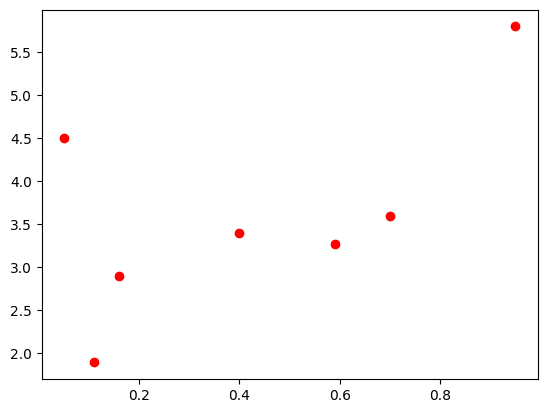

In [12]:
data = np.array([[0.4, 3.4], [0.95, 5.8], [0.16, 2.9], [0.7, 3.6], [0.59, 3.27], [0.11, 1.89], [0.05, 4.5]])
plt.scatter(data[:,0], data[:,1], color='red', label='Data')
plt.show()

Split the data to A,b.<br/>
Since the data is non-zero centered, center it to mean zero (since we discussed only y=wx). Then, run the solution.

In [13]:
from typing_extensions import dataclass_transform

X, y =  data[:, 0], data[:, 1]

# Reshape X to a column vector
X = X.reshape(-1, 1)

mean =[np.mean(X), np.mean(y)]

X_centered= X-mean[0]
Y_centered =y-mean[1]

mean_after =[np.mean(X_centered), np.mean(Y_centered)]
# print("\nmean after is ",mean_after)

w = Linreg_sol(X_centered, Y_centered)

# Restore the original line. if y'=wx' (after removing bias) than y-u_y = w(x-u_x), isolate y.
print(f'The linear line is y={w:.2f}*(x-{mean[0]:.2f})+{mean[1]:.2f}')

ModuleNotFoundError: No module named 'typing_extensions'

Plot the line solution <br/>
Does the line really fits the data? <br/>
<font color='red'>Write here your answer and explain why</font><br/>
it does not fit the data because:<br/>
1.the relationship between the x and y is not linear <br/>
2.in our data there are outliers that pulls the regression line towards them, leading to a poor fit.


In [ ]:
x = np.arange(-0.01, 1, 0.01)
y = w * (x - mean[0]) + mean[1]
plt.plot(x,y)

plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

NameError: name 'w' is not defined

As we learned, try scaling using standardization, repeat the above process.<br/>DON'T use sklearn

In [ ]:

mean = np.mean(data,axis=0)
std = np.std(data,axis=0)


X, y =  data[:, 0], data[:, 1]
# Reshape X to a column vector
X = X.reshape(-1, 1)


# X=(X-E[X])/VAR(X)^0.5
X_standarized= (X-mean[0])/std[0]
y_satndarized=(y-mean[1])/std[1]

w = Linreg_sol(X_standarized,y_satndarized)


# Restore the original line. if y'=wx' (after standardization) than (y-u_y)/std_y = w(x-u_x)/std_x, isolate y.
print(f'The linear line is y=({w:.2f}*((x-{mean[0]:.2f})/{std[0]:.2f})*{std[1]:.2f}+{mean[1]:.2f})')

The linear line is y=(0.59*((x-0.42)/0.31)*1.15+3.62)


Plot the line solution <br/>
Is the result better? <br/>
Hint: compare both lines obtained. Why do you think this happened? <br/>
<font color='red'>Write here your answer and explain why</font>
<br/> no the result is exactly the same ( it gives the same fit ) and this is because that we have only one feature so if scaled or not it is the same

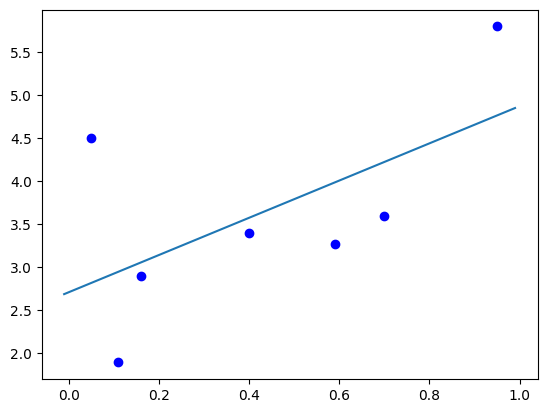

In [ ]:
x = np.arange(-0.01, 1, 0.01)
y = w * (x - mean[0]) * std[1] / std[0] + mean[1]
plt.plot(x,y)

plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

We Say that a point as outlier if it is located further than one standard deviation above or below the best-fit line. <br/>
Find and print the outliers from the (original) dataset


In [ ]:
# Implement here and print the point that is outlier.

X, y =  data[:, 0], data[:, 1]
X = X.reshape(-1, 1)


#calclate the predicted y according to the regression parameter found w  then calculate the distance between it and between it's real value 

# #1
# w = Linreg_sol(X_centered,Y_centered)
# predicted_centerd_y = w * X_centered 
# distance = np.abs(predicted_centerd_y - Y_centered.reshape(-1, 1) )
# outliers = distance > std[1]


#2
w = Linreg_sol(X_standarized,y_satndarized)
predected_standarized_y = w * X_standarized
distance = np.abs(predected_standarized_y - y_satndarized.reshape(-1, 1) )
outliers =distance > 1



# Print the points that are outliers
print("outliers points:")
for i in range(outliers.size):
    if outliers[i]:
        print(f'\n({X[i]},{y[i]})')



outliers points:

([0.05],4.5)


Run the linear regression again, but remove the outliers <br/>
Is the result better? <br/>
<font color='red'>Write here your answer and explain</font>
<br/>yes the result is better (we removed the outliers that pulled the regression line towards them, leading to better fit.)

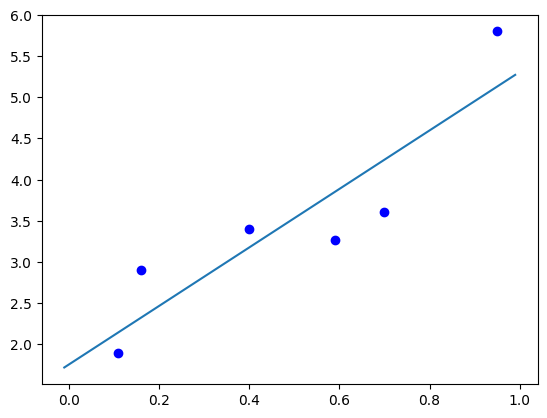

In [ ]:
data = np.array([[0.4, 3.4], [0.95, 5.8], [0.16, 2.9], [0.7, 3.6], [0.59, 3.27], [0.11, 1.89], [0.05, 4.5]])

# Remove the outlier points

outliers = np.array(outliers)

# Create an empty array to store cleaned data
cleaned_data = np.empty((0, 2))

# Insert non-outlier data points into cleaned_data
for i in range(outliers.size):
    if not outliers[i]:
        cleaned_data = np.append(cleaned_data, [data[i]], axis=0)

data = cleaned_data

# print(data)

mean = np.mean(data,axis=0)
std = np.std(data,axis=0)

X, y =  data[:, 0], data[:, 1]
# Reshape X to a column vector
X = X.reshape(-1, 1)


# X=(X-E[X])/VAR(X)^0.5
X_standarized= (X-mean[0])/std[0]
y_satndarized=(y-mean[1])/std[1]

w = Linreg_sol(X_standarized,y_satndarized)

x = np.arange(-0.01, 1, 0.01)
y = w * (x - mean[0]) * std[1] / std[0] + mean[1]
plt.plot(x,y)

plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

## Question 2 - Gaussian bayes


You are given data of wine bottles and want to learn the type of wine which it belongs to. The dataset consists of 13 continuous features and 3 classes of wine. <br/>
Since the data is continuous, you will implement Gaussian bayes and compare to Gaussian naïve bayes.

import libarires

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Load the wine dataset from https://sharon.srworkspace.com/ml/datasets/hw1/wine.data.csv

In [ ]:
df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw1/wine.data.csv')

print(df.shape)
df.head(5)

(178, 14)


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Check if there is even potential for gaussian assumption to work here, by plotting the density of the features, using plotting for data frames. <br/>
Will gaussian bayes work here or not? <br/>
<font color='red'>Write here your answer and explain it</font>
<br/>yes we can each feature density is close to gaussian distribution therfore the gaussian bayes will work here 


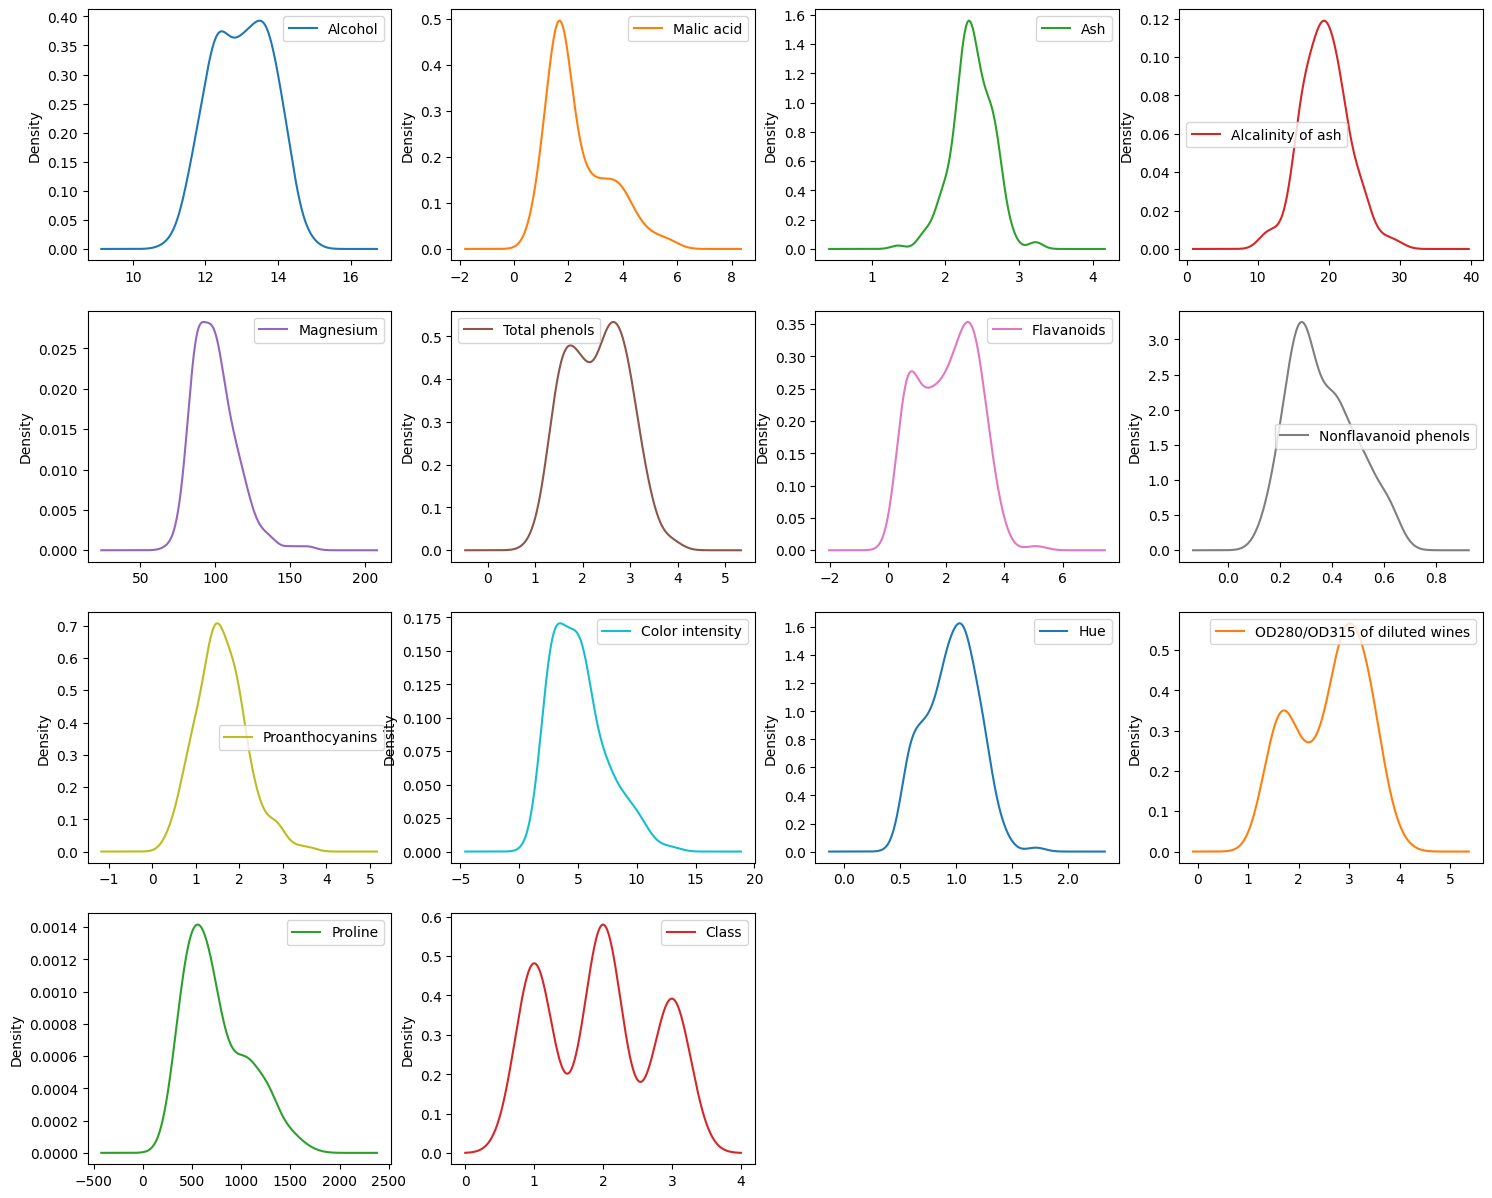

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,4), figsize=(18, 15), sharex=False)
plt.show()

Convert the data to numpy and split the data to 80% training and 20% test with random state of 25. <br/>Note that the data frame currently includes the labels as well.

In [ ]:

# Convert the dataframe to numpy array
data = df.values

# Split the data into features (X) and classes (y)
X = data[:, :-1]  # Features
y = data[:, -1]   # classes


# Split the data into 80% training and 20% test with a random state of 25
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)


Implement the functions below. <br/>Both get test point x and return the predicted class, but the naïve bayes assumes that the features are independent.<br/>
Hint for efficient implementation: you don't need more than one loop, use numpy!

In [ ]:
def calc_parameters(X_train,y_train):

  # Separate data by class
  class_data = {i: X_train[y_train == i] for i in np.unique(y_train)}

  # Calculate mean and covariance matrix for each class using np functions
  mean_list = {i: np.mean(data, axis=0) for i, data in class_data.items()}

  # Calculate covariance matrix for each class using np functions
  cov_matrix_list_gauss = {i: np.cov(data, rowvar=False) for i, data in class_data.items()}

  # Calculate variance for each class using np functions
  var_list = {i: np.var(data, axis=0) for i, data in class_data.items()}

  # Calculate prior probabilities
  prior_probabilities = {i: len(data) / len(y_train) for i, data in class_data.items()}

  return mean_list, cov_matrix_list_gauss, var_list,prior_probabilities

def classify_point_gaussian_bayes(x):
    num_classes = len(prior_probabilities)
    #likelihoods = np.zeros(num_classes)
    likelihoods ={}

    #for i in range(num_classes):
    for category in np.unique(y_train):
        mean = mean_list[category]

       ## print(f'mean of category {category} is {mean}')

        cov_matrix = cov_matrix_list_gauss[category]
        prior_prob = prior_probabilities[category]

        # Calculate the probability density function using the multivariate normal distribution
        likelihood = (1 / ((2 * np.pi) ** (len(x) / 2) * np.linalg.det(cov_matrix) ** 0.5)) * \
                      np.exp(-0.5 * (x - mean).T @ np.linalg.inv(cov_matrix) @ (x - mean))

        # Combine likelihood with prior probability
        likelihoods[category] = likelihood * prior_prob


   ## print(f' the likelihoods are : {likelihoods}')

    # Return the category with the maximum likelihood
    predicted_category = max(likelihoods, key=likelihoods.get)
    return predicted_category


def classify_point_gaussian_naive_bayes(x):
    num_classes = len(mean_list)
    log_likelihoods = {}

    for category in np.unique(y_train):
        mean = mean_list[category]
        var = var_list[category]
        prior_prob = prior_probabilities[category]

        # Calculate the log likelihood for each feature
        log_feature_likelihoods = -0.5 * ((x - mean) ** 2) /var -0.5* np.log(2 * np.pi * var)

        # Sum the log likelihoods of individual features
        #log(p(x|class)) = sum from i to d [(-(xi - meani)^2 /2 vari)*log(1/(2pi*vari)^0.5)
        #log(1/(2pi*vari)^0.5) = log((2pi*vari)^-0.5) = -0.5 *log((2pi*vari))
        log_likelihood = np.sum(log_feature_likelihoods)

        # Combine log likelihood with log prior probability log(p(x|class) * p(class))
        log_likelihoods[category] = log_likelihood + np.log(prior_prob)

   ## print(f' the likelihoods are : {log_likelihoods}')

    # Return the class with the maximum log likelihood
    predicted_category = max(log_likelihoods, key=log_likelihoods.get)
    return predicted_category



Look at the test accuracies for both methods. Explain the differences origin. <br/>
Hint: Use correlation matrix visualization for data frames.  
<font color='red'>Write here your answer and explain it</font>
<br/>the gussian is better than the naive bayes because  there is correlation between the features. and as we learned the naive bayes better than the gaussian bayes when the features are independent (there is no correlation between them )

<br/> Reminder: success rate is the precentage of correctly classified data within the number of all data in the test set.

In [ ]:

mean_list, cov_matrix_list_gauss, var_list,prior_probabilities =calc_parameters(X_train,y_train)

res = []
for idx, test_point in enumerate(x_test):
  res.append(classify_point_gaussian_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian bayes is {res.count(True)/len(res)}')

res = []
for idx, test_point in enumerate(x_test):
  res.append(classify_point_gaussian_naive_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian naive bayes is {res.count(True)/len(res)}')

Test accuracy for gaussian bayes is 0.9722222222222222
Test accuracy for gaussian naive bayes is 0.9444444444444444


Now, scale the data using StandardScaler.<br/>
Make sure that you are scaling the test according to the training (as learned in class)


In [ ]:

# Create a StandardScaler object
scaler = StandardScaler()

# fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)




Look at the test accuracies now. What can you conclude about the effect  of scaling? Is it good/bad? <br/>
<font color='red'>Write here your answer and explain it</font><br/>
nothing happened!! we can conclude that scailing is not neccessary 


In [ ]:
mean_list, cov_matrix_list_gauss, var_list,prior_probabilities =calc_parameters(X_train_scaled,y_train)
res = []
for idx, test_point in enumerate(x_test_scaled):
  res.append(classify_point_gaussian_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian bayes is {res.count(True)/len(res)}')

res = []
for idx, test_point in enumerate(x_test_scaled):
  res.append(classify_point_gaussian_naive_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian naive bayes is {res.count(True)/len(res)}')

Test accuracy for gaussian bayes is 0.9722222222222222
Test accuracy for gaussian naive bayes is 0.9444444444444444


Run the boundaries plotting for (scaled) train and test with gaussian bayes.<br/>It will show the decision boundaries as saw in the tutorials.

(9328, 13)


9328it [00:05, 1568.95it/s]


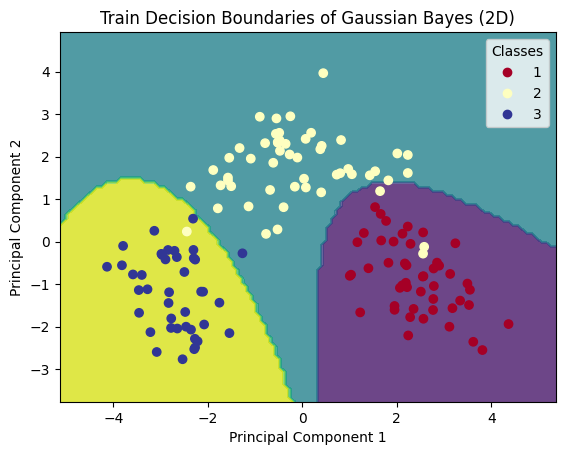

In [ ]:
from sklearn.decomposition import PCA
from tqdm import tqdm


# Reduce the dimensionality of the data to 2 using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_scaled)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = np.zeros(len(grid_points))
for idx, test_point in tqdm(enumerate(grid_points)):
  Z[idx] = classify_point_gaussian_bayes(test_point)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Train Decision Boundaries of Gaussian Bayes (2D)')
plt.show()

(7134, 13)


7134it [00:04, 1575.32it/s]


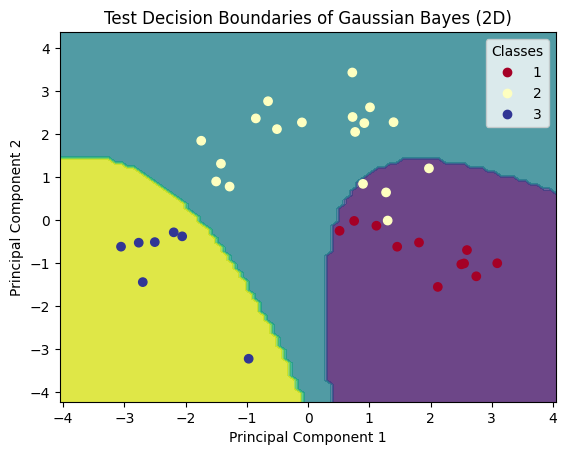

In [ ]:
from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
X_reduced = pca.transform(x_test_scaled)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = np.zeros(len(grid_points))
for idx, test_point in tqdm(enumerate(grid_points)):
  Z[idx] = classify_point_gaussian_bayes(test_point)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Test Decision Boundaries of Gaussian Bayes (2D)')
plt.show()

## Question 3 - Naive Bayes

In this problem, you’ll implement a basic Naïve Bayes classifier, and use it to predict if a tweet is about cyberbullying or not. <br/>
We will have to classify sentences into 5 categories, <b>but could be any number.</b><br/>
The categories are {"not bullying", "gender", "age", "religion", "ethnicity"}.


import libarires

In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Implement the function. It reads all tweets from file and returns the following data structures: <br/>
•	texall - list of documents; each entry corresponds to a tweet which is list of words. <br/>
•	lbAll list of tweets' labels.<br/>
•	voc - set of all distinct words in the file.<br/>
•	cat - set of tweets categories.


In [ ]:
def readTrainData(file_name):

  #thee first column is category and the next one is the text
  df = pd.read_csv(file_name, header=None, names=['category', 'text'])

  #.apply(lambda x: x.split()): This applies a function to each element of the 'text' column.
  #In this case, the function is a lambda function (lambda x: x.split()), which splits each text (tweet) a string into a list of words based on whitespace.
  texAll = df['text'].apply(lambda x: x.split()).tolist()
  lbAll = df['category'].tolist()
  cat=set(df['category'])

  # converts a collection of text documents to a matrix of token counts.
  vectorizer = CountVectorizer()

  #builds a vocabulary based on the unique words present in the 'text' column
  vectorizer.fit(df['text'])
  #vectorizer.get_feature_names() :retrieve the feature names, which are essentially the unique words in the vocabulary.
  #set() :converts list into a set. ensures no duplicates.
  voc = vectorizer.get_feature_names_out()

  return texAll, lbAll, voc, cat

Implement the function, which computes and returns the probabilities (on the train set):<br/>
- $P_w$ - a matrix of class-conditional probabilities, $p(x|w_i)$
- $P$ - a vector of class priors, $p(w_i)$

Make sure you deal with the case of word that appears in voc but not in class $w$.

In [ ]:
def learn_NB_text():

    #calc the occurrences of each category in cat
    category_occurrences = np.array([lblAll_train.count(category) for category in cat])
    categories_number = len(lblAll_train)

    #p(category) = number of category occurrences / categories_number
    P = category_occurrences / categories_number


    vectorizer = CountVectorizer(vocabulary=voc, binary=True)

    #X[i][j] = 1 if word j occurrs in the i'th tweet in texAll_train and 0 otherwise
    X = vectorizer.fit_transform([' '.join(doc) for doc in texAll_train])
    X_dense = X.toarray()

    # Initialize Pw as a matrix |# categories| x |voc|
    Pw = np.zeros((len(cat), len(voc)))


    for i, category in enumerate(cat):

        #find all the tweets that labeled as category
        class_indices = np.where(np.array(lblAll_train) == category)[0]

        #returns vector of size voc such that word_counts[i] = # of occurrences of wordi in the tweets of category
        word_counts = np.sum(X_dense[class_indices, :], axis=0)

        #the i th row of the matrix contains all the probabilities p(word1|categroyi), p(word2|categoryi),.............
        #p(word|categoryi) =(# occurrences of word +a ) / number of the words in the category +a*d
        #a=1 and d=len(voc)
        Pw[i, :] = (word_counts + 1) / (np.sum(word_counts) + len(voc))


    return Pw, P

Implement fhe function that classifies all tweets from the test set and computes the success rate.<br/>
Iterate over all tweets of test and for each tweet find the most probable category.
<br/><br/>
Note1: Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. <br/>Class with highest final un-normalized log probability score is still the most probable.


In [ ]:
#tweet = w1w2w3...
# p(cat|tweet)= p(tweet|cat)*p(cat)/p(tweet) = p(w1,w2,w3..|cat)*p(cat)/p(tweet)
# = p(w1|cat)*p(w2|cat)*p(w3|cat)...*p(wn|cat)*p(cat)/p(tweet)
# we want to maximize p(cat|tweet) it is the same as maximizing p(w1|cat)*p(w2|cat)*p(w3|cat)...*p(wn|cat)*p(cat)
#and the same is maximizing log[( p(w1|cat)*p(w2|cat)*p(w3|cat)...)*p(cat)] = sum[log(p(wi|cat))]+log(p(cat))
def ClassifyNB_text( Pw, P):


    num_tweets = len(texAll_test)

    #predicted_categories will contain in the i th place the prediction of the i th tweet
    predicted_categories = []

    voc_list = list(voc)  # Convert voc to a list
    cat_list = list(cat)  # Convert cat to a list


    for tweet in texAll_test:

        #we will calc the prob of log(p(catygory|tweet) in once for all the categories
        #log_probs[i] = sum[from k to number of words in tweet log(p(wk|cati))]+log(p(cati))  => log(p(catygoryi|tweet))
        log_probs = np.log(P) + np.sum([np.log(Pw[:, voc_list.index(word)]) for word in tweet if word in voc_list], axis=0)

        # Find the index of the maximum log probability (this is the predicted class)
        predicted_cat = cat_list[np.argmax(log_probs)]
        predicted_categories.append(predicted_cat)

    #1/0 loss: if the predicted category == true category then 1 else 0
    correct_predictions = sum(1 for true_category, predicted_cat in zip(lblAll_test, predicted_categories) if true_category == predicted_cat)

    #the success_rate is the mean of the 1/0 loss sum
    success_rate = correct_predictions / num_tweets

    return success_rate


Read the files

In [ ]:
TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/cyber_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/cyber_test.csv'

# to check if learn_NB_text is okay
# texAll_train, lblAll_train, voc, cat = readTrainData('/content/sample_data/my_training_data.csv')

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)
# cats must be the same at train and test
# voc of test is irrelevant - we already trained on other voc.
texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)


Train the model, classify it on the test and report the success rate

In [ ]:
# print(f'voc size {len(voc)} is {voc}')
Pw, P  = learn_NB_text()

# print(f'p {P}')
# print(f'pw {np.log(Pw)}')

sum_right = ClassifyNB_text(Pw, P)
print(f'\n{sum_right}')



0.949748743718593


## Question 4 - KNN

You want to detect types into 6 types of stars by measuring their properties. <br/> NASA gave you their dataset, including temperature, color, Spectral_Class and more. <br/> In addition, you aim to compare different distance metric to determine which one is the best for this data.

import libaries

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load the data, print the first three rows<br/>
https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv

In [16]:
df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv')
print(df.head(3))

   Temperature       L       R    A_M Color Spectral_Class  Type
0         3068  0.0024  0.1700  16.12   Red              M     0
1         3042  0.0005  0.1542  16.60   Red              M     0
2         2600  0.0003  0.1020  18.70   Red              M     0


Convert categorial features to discerete values

In [17]:
colors = df['Color'].unique()
for idx, color in enumerate(colors):
  df['Color'] = df['Color'].replace({color: idx})

spec_class = df['Spectral_Class'].unique()
for idx, spec in enumerate(spec_class):
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})
df.head(3)

C:\Users\Alpha\AppData\Local\Temp\ipykernel_20088\3654998465.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Color'] = df['Color'].replace({color: idx})
C:\Users\Alpha\AppData\Local\Temp\ipykernel_20088\3654998465.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,0,0,0
1,3042,0.0005,0.1542,16.60,0,0,0
2,2600,0.0003,0.1020,18.70,0,0,0


Check the correlation matrix between the features. <br/>
Which distance metric do you expect to work better: Euclidean distance, of the Mahalanobis distance? <br/>
<font color='red'>Write here your answer and explain it</font><br/>
for our data the features are correlated, and we want to account for this correlation, Mahalanobis distance will be better from euclidean that used when features are not strongly correlated



In [18]:

# Select only the features without the 'Class' column
features = df.drop(columns=['Type']).values

# Calculate the covariance matrix
cov_matrix = np.cov(features, rowvar=False)

# Calculate the standard deviations of each variable
std_devs = np.sqrt(np.diag(cov_matrix))

# Calculate the correlation matrix
#np.outer(std_devs, std_devs) is matrix |feature| x |features| each cell i,j containt dev[i]*dev[j]
correlation_matrix = cov_matrix / np.outer(std_devs, std_devs)

# Display the correlation matrix
print(correlation_matrix)


[[ 1.          0.39340408  0.06421597 -0.42026054  0.53593417  0.52740414]
 [ 0.39340408  1.          0.52651572 -0.69261923  0.19924876  0.40947338]
 [ 0.06421597  0.52651572  1.         -0.60872823 -0.06250917  0.0014671 ]
 [-0.42026054 -0.69261923 -0.60872823  1.         -0.35227141 -0.43367314]
 [ 0.53593417  0.19924876 -0.06250917 -0.35227141  1.          0.70151577]
 [ 0.52740414  0.40947338  0.0014671  -0.43367314  0.70151577  1.        ]]


Split the data to 80% train and 20% test, with random state 21. <br/>
Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method. <br/> You can check the balance using df.value_counts().

In [19]:
X = df.drop('Type', axis=1)
y = np.array(df['Type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21,stratify=y)
X_train = np.array(X_train)
X_test = np.array(X_test)


Implement the functions 'Euclidian', 'Manhattan'. <br/>
Those functions get train and test datasets and return distance metric, sized mxn (where m is the number of samples in test and n is the number of samples in train).<br/>
Reminder: Manhattan distance is $d(x,y)=\sum_{i=1}^d |x_i-y_i|$, d is the features number.


In [20]:
def Euclidean(test, data):

  # data = np.array(data)
  # test= np.array(test)

  n = len(data)
  m = len(test)

  distances_euclidean = np.zeros((m,n))

  for i in range(m):
    for j in range(n):
      #if test[i] =x1x2x3x4....xd and data[i]=y1y2y3....yd then distances_euclidean[i, j]= (sum from i=1 to d((xi-yi)^2))^0.5
      distances_euclidean[i, j] = np.sqrt(np.sum((test[i] - data[j]) ** 2))

  return distances_euclidean


def Manhattan(test, data):

  # data = np.array(data)
  # test= np.array(test)
  n = len(data)
  m = len(test)
  distances_manhattan = np.zeros((m, n))

  for i in range(m):
    for j in range(n):
       #if test[i] =x1x2x3x4....xd and data[i]=y1y2y3....yd then distances_manhattan[i, j]= (sum from i=1 to d|xi-yi|))
      distances_manhattan[i, j] = np.sum(np.abs(test[i] - data[j]))

  return distances_manhattan


def Mahalanobis(test, data):


  # data = np.array(data)
  # test= np.array(test)

  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)

  # Calculate the Mahalanobis distances
  for i in range(test.shape[0]):
    for j in range(data.shape[0]):
        diff =  test[i] - data[j]
        distances[i, j] = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance_matrix_data)), diff.T))
  return distances

Implement the function kNN_classify that returns array sized m, which are the predictions for the m test samples.

In [21]:
def kNN_classify(data, labels, test, k, metric='Euclidian'):

  arguments = (test, data)
  distances = eval(f'{metric}(*arguments)')   #returns np[][] |test| X |data| by the given metric.

  # Finding the indices of k nearest neighbors for each test sample
  #row i in distences represent the distances between test[i] and all the training data
  #arg sort returns the indces of the k lowest distances for all rows
  #the output is matrix |test| x |k| each row represents the k lowest distance from dest
  nearest_neighbors_indices = np.argsort(distances, axis=1)[:, :k]

  # Retrieving classes (type) for the k nearest neighbors
  nearest_neighbors_classes = labels[nearest_neighbors_indices]

  # the predicted class of test sample is the class that have the most number of occurences among the k nearest train data samples
  predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=nearest_neighbors_classes)

  return predictions


Look at the plots for different k values and compare those metrics.

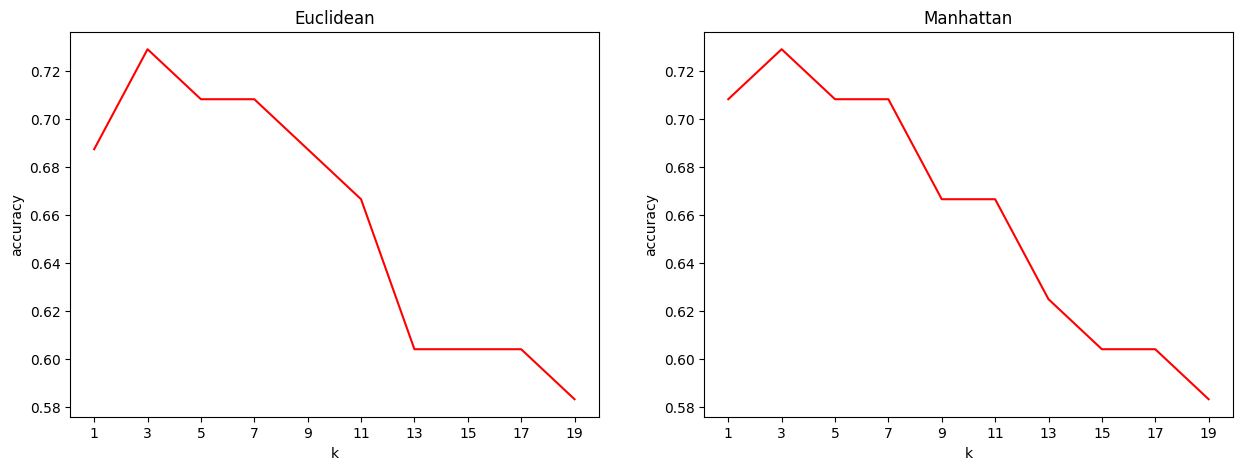

In [26]:
metrics = ['Euclidean', 'Manhattan']
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for idx, metric in enumerate(metrics):
  # Plot data points and fitting line for Ordinary Least Squares

  #the k's values we want to check are the odd values in range 1 to 20
  ks = np.arange(1, 20, 2)
  accs = []
  for k in ks:
    predicted_classes = kNN_classify(X_train, y_train, X_test, k, metric)

    #correct_predictions[i] will contain 1 if the prediction is the same as the true class and 0 otherwise
    correct_predictions = predicted_classes == y_test
    #calculate the percentage of correct predictions
    accuracy = np.sum(correct_predictions)/len(correct_predictions)
    accs.append(accuracy)

  axs[idx].plot(ks, accs, color='red')
  axs[idx].set_xlabel('k')
  axs[idx].set_ylabel('accuracy')
  axs[idx].set_title(metric)
  axs[idx].set_xticks(ks)
plt.show()

The Mahalanobis distance metric is already implemented to you. <br/>Run the following code and answer: Which gives better accuracy?<br/>
<font color='red'>Write here your answer and explain it</font><br/>  Mahalanobis first it gives the best accuracy (0.93) when the best accuracy for Euclidean and Manhattan is 0.73 for some k .and we see that after k=15 the Mahalanobis gives the same accuracy (0.82) and for the other two metrics it keeps to decrease  

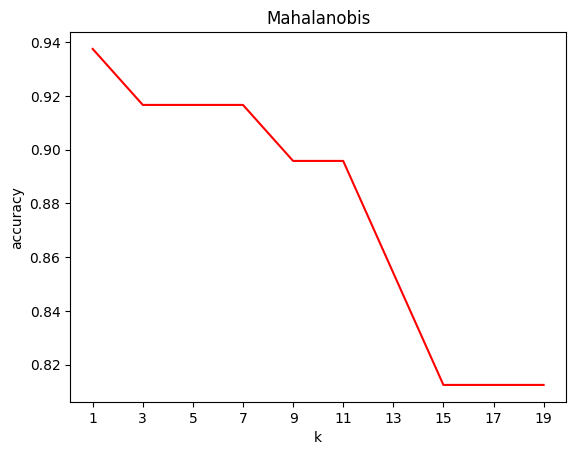

In [24]:
ks = np.arange(1, 20, 2)
accs = []
for k in ks:
  predicted_classes = kNN_classify(X_train, y_train, X_test, k, 'Mahalanobis')
  #correct_predictions[i] will contain 1 if the prediction is the same as the true class and 0 otherwise
  correct_predictions = predicted_classes == y_test
  #calculate the percentage of correct predictions
  accuracy = np.sum(correct_predictions)/len(correct_predictions)
  accs.append(accuracy)


plt.plot(ks, accs, color='red')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Mahalanobis')
plt.xticks(ks)
plt.show()

### Thats it!
If you choose to continue, 5 pts bonus!

We want to use advanced distance metric: <br/>
$$d_{\text{hybrid}}=d_{\text{mahalanobis}}+0.5*d_{\text{cosine}}$$
Implement the function 'Hybrid', which returns the distance metric, as defined above.


In [ ]:
def Cosine(test, data):
  # data = np.array(data)
  # test= np.array(test)
  distances = np.zeros((test.shape[0], data.shape[0]))

  # Calculate the Cosine distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          distances[i, j] = 1 - np.sum(test[i] * data[j]) / (np.linalg.norm(test[i]) * np.linalg.norm(data[j]))
  return distances

def Hybrid(test, data):
    # data = np.array(data)
    # test= np.array(test)
   return Mahalanobis(test, data)+0.5*Cosine(test, data)
   

Look at the plot. Does it perform better than the previous metrics? <br/>
yes it does we can se that all accurcies of hybrid are between (0.88 to 0.96) but for other metrics the ranges were much more less than this. mahan : (0.82 to 0.94) euc and manhattan:(0.58 to 0.73). and in the hybrid metric we can see that for most of the givven k values the accurcy is 0.92 and bigger.

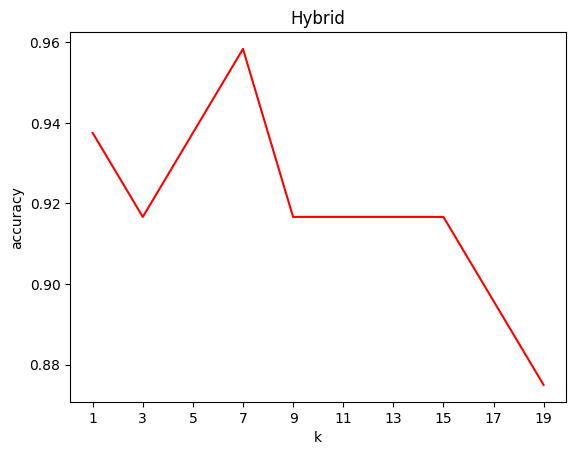

In [ ]:
ks = np.arange(1, 20, 2)
accs = []
for k in ks:
  predicted_classes = kNN_classify(X_train, y_train, X_test, k, 'Hybrid')
  #correct_predictions[i] will contain 1 if the prediction is the same as the true class and 0 otherwise
  correct_predictions = predicted_classes == y_test
  #calculate the percentage of correct predictions
  accuracy = np.sum(correct_predictions)/len(correct_predictions)
  accs.append(accuracy)

plt.plot(ks, accs, color='red')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Hybrid')
plt.xticks(ks)
plt.show()


In [ ]:
#the following cell plots the densities of the features 

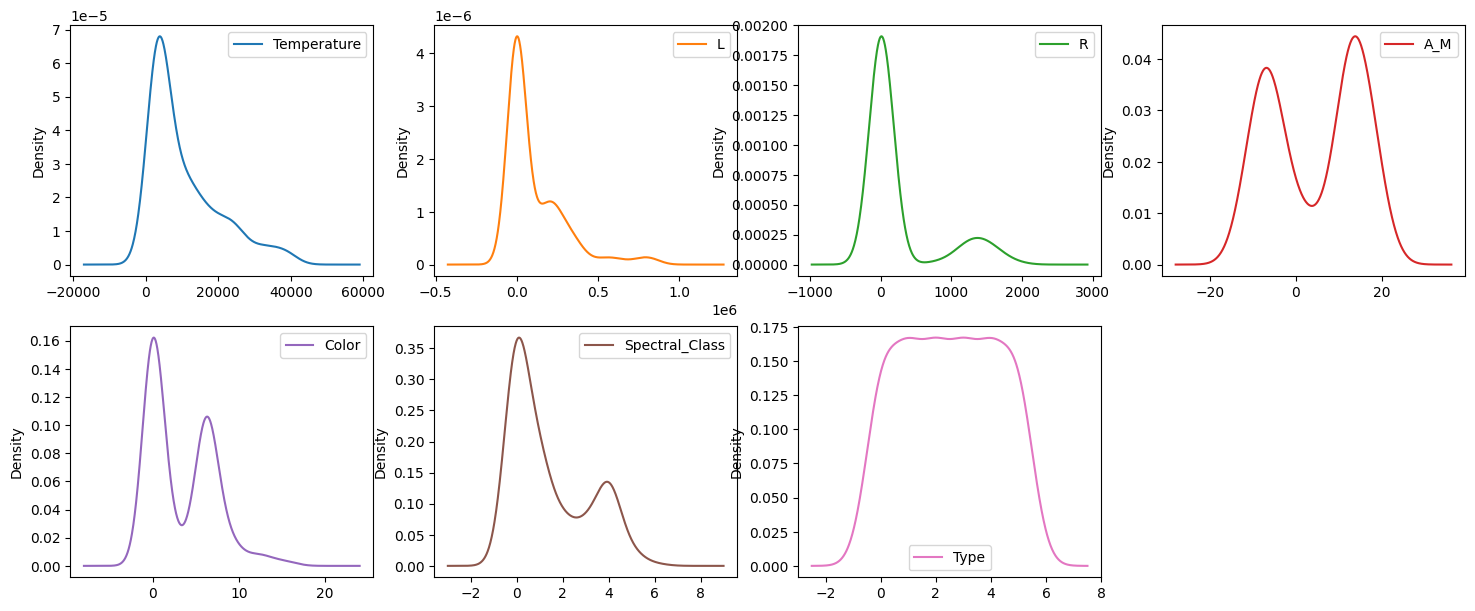

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,4), figsize=(18, 15), sharex=False)
plt.show()

In [ ]:
# we have to choose one of the two scalers we learned: min_max scaler or standard_scaler 
#in our case the dinsities of the features are gaussian therfore we will choose standard_scaler 
# tried both of them and found that standard is better 

You forgot to use scaling! Based on the feature densities (as done in Q2), determine which scaler should we use and perform it.

In [ ]:
# # Peform scaling
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


# from sklearn.preprocessing import MinMaxScaler
# # Initialize the scaler
# scaler = MinMaxScaler()

# # Fit and transform the training data
# X_train_scaled = scaler.fit_transform(X_train)

# # Transform the test data using the same scaler
# X_test_scaled = scaler.transform(X_test)

Look at the plots. Did it help the accuracies? Try to justify the change in the hybrid metric.  
<font color='red'>Write here your answer and explain it</font>
<br/>for euclidian and manhatatan it helped, as we can see in the auclidian the max accuracy before scaling was 0.73 and now we can see it is 0.98 and the lowest accurcy in the given range is 0.83 which is even higher than the max acurracy before scaling<br/>
for mahalanobis it is the same before and after. <br/>
for Hybrid it does not helped even it is worst than without scaling we can see that before scaling we had 0.96 as the max accurcy for some value of k, and after scailing the max is 0.94 also after scailing the acurracy descends more abruptly than before scaling


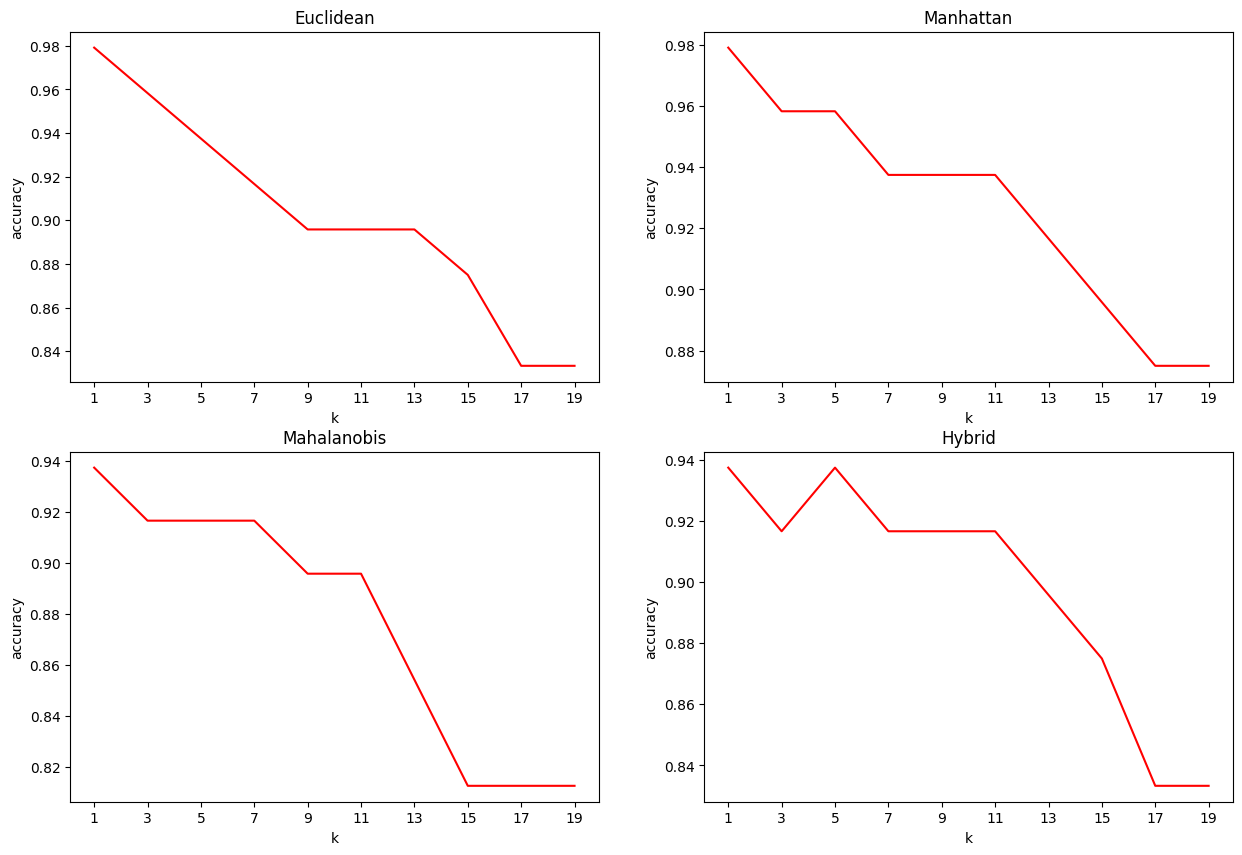

In [ ]:

metrics = ['Euclidean', 'Manhattan', 'Mahalanobis', 'Hybrid']
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for idx, metric in enumerate(metrics):
  # Plot data points and fitting line for Ordinary Least Squares

  ks = np.arange(1, 20, 2)
  accs = []
  for k in ks:
    predicted_classes = kNN_classify(X_train_scaled, y_train, X_test_scaled, k, metric)
    #correct_predictions[i] will contain 1 if the prediction is the same as the true class and 0 otherwise
    correct_predictions = predicted_classes == y_test
    #calculate the percentage of correct predictions
    accuracy = np.sum(correct_predictions)/len(correct_predictions)
    accs.append(accuracy)

  axs[idx // 2, idx % 2].plot(ks, accs, color='red')
  axs[idx // 2, idx % 2].set_xlabel('k')
  axs[idx // 2, idx % 2].set_ylabel('accuracy')
  axs[idx // 2, idx % 2].set_title(metric)
  axs[idx // 2, idx % 2].set_xticks(ks)
plt.show()